<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis


In [7]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


How would the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables affect the launch outcome?

As the flight number increases, the first stage is more likely to land successfully. 
The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


<Figure size 1000x500 with 0 Axes>

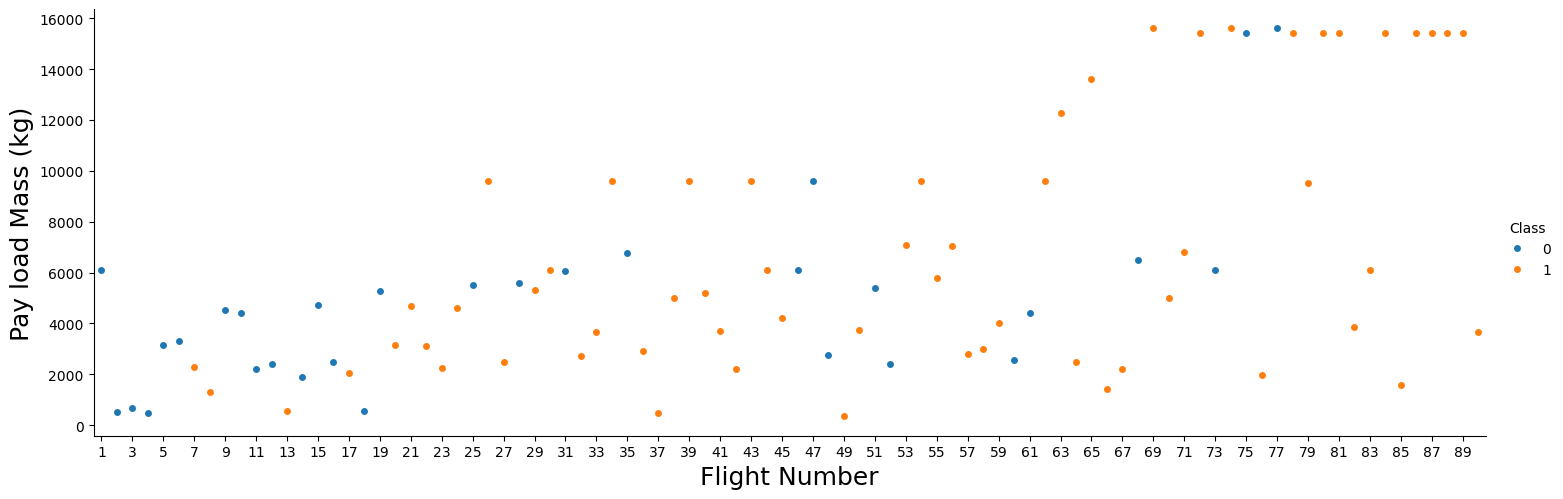

In [17]:

plt.figure(figsize=(10, 5))
g = sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 3)

g.set_axis_labels("Flight Number", "Payload Mass (kg)", fontsize=20)
ax = g.ax
ax.set_xticks(ax.get_xticks()[::2])

plt.xlabel("Flight Number", fontsize=18)
plt.ylabel("Pay load Mass (kg)",fontsize=18)
plt.show()

### Visualize the relationship between Flight Number and Launch Site


<Figure size 1200x800 with 0 Axes>

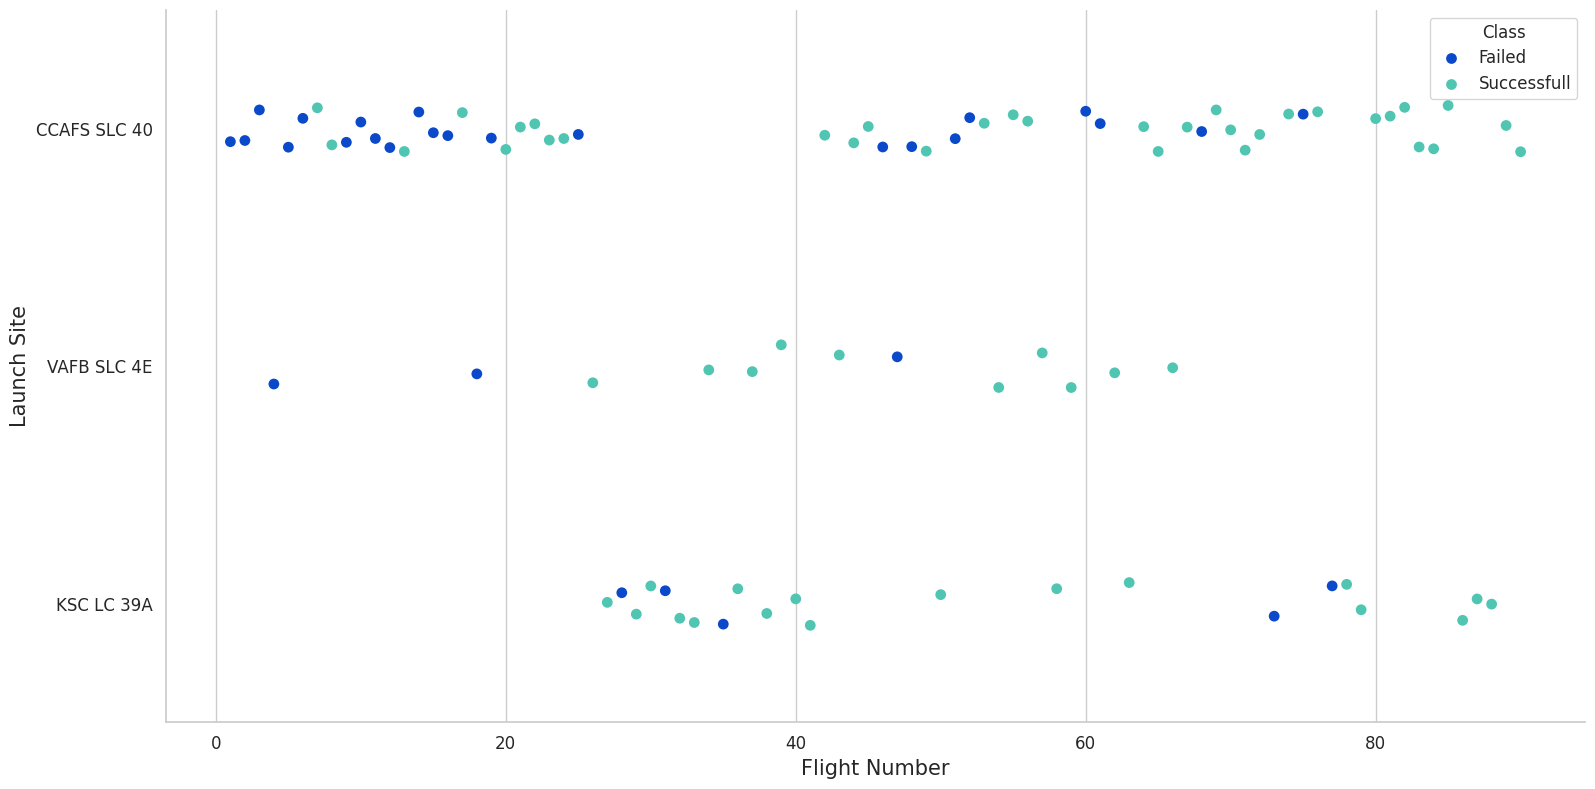

In [70]:

plt.figure(figsize=(12, 8))

sns.set_theme(style="whitegrid")  # You can also use 'darkgrid', 'white', 'ticks', etc.
custom_palette = ["#0B49CB", "#50C5B2"] 

g = sns.catplot(y='LaunchSite', x='FlightNumber', hue='Class', data=df,
                aspect=2, height=8, palette=custom_palette, legend_out=False, s=60)

g.set_axis_labels("Flight Number", "Launch Site", fontsize=15)
g.set_titles("Launch Site vs Flight Number by Class", fontsize=18)

#Rename Labels in legend
new_labels = ['Failed', 'Successfull']  # Specify the new legend labels
legend = g._legend

for t, l in zip(legend.texts, new_labels):
    t.set_text(l)
    t.set_fontsize(12)
    
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Optionally remove spines for a cleaner look
sns.despine()

plt.show()

### Visualize the relationship between Payload Mass and Launch Site


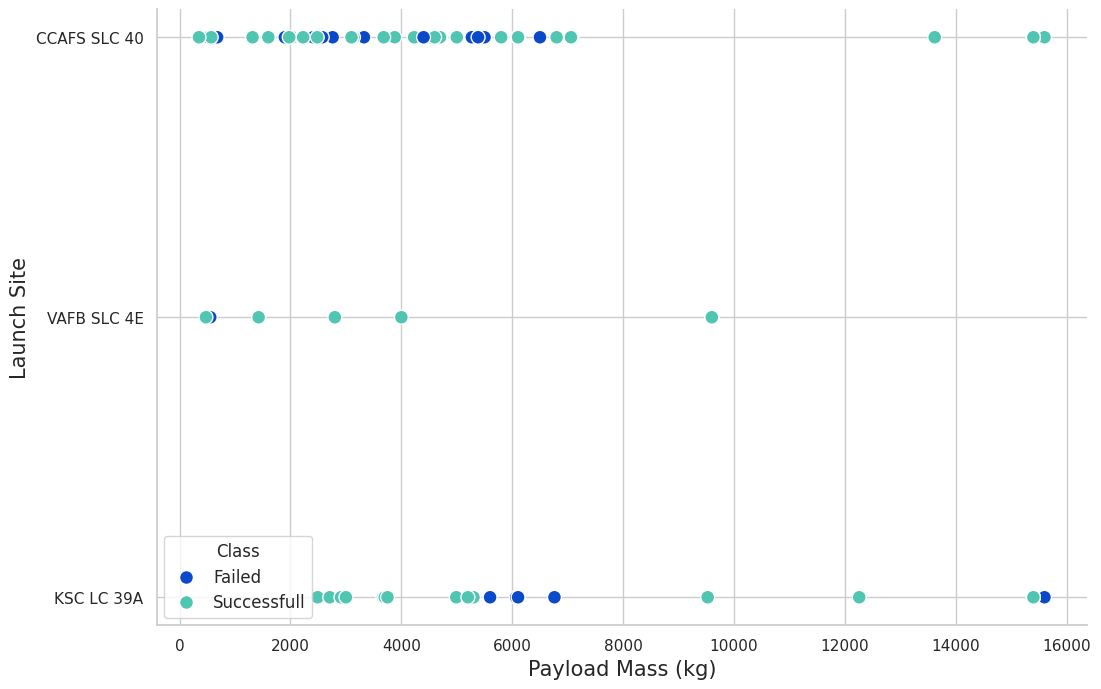

In [69]:
sns.set_theme(style="whitegrid")

# Create the scatter plot, customizing marker size and palette
plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df,
                          palette=custom_palette, s=100, edgecolor='w', linewidth=1)

#Rename Labels in legend
new_labels = ['Failed', 'Successfull']  # Specify the new legend labels
legend = scatter.get_legend()

for t, l in zip(legend.texts, new_labels):
    t.set_text(l)
    t.set_fontsize(12)

scatter.set_xlabel("Payload Mass (kg)", fontsize=15)
scatter.set_ylabel("Launch Site", fontsize=15)

# Show the plot
plt.show()


At the he VAFB-SLC launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### Visualize the relationship between success rate of each orbit type


<ipython-input-88-52988ca907ff>:5: UserWarning: 
The palette list has fewer values (2) than needed (11) and will cycle, which may produce an uninterpretable plot.
  bar =  sns.barplot(x='Orbit', y='Class', hue='Orbit', data=grouped_data, palette=custom_palette)


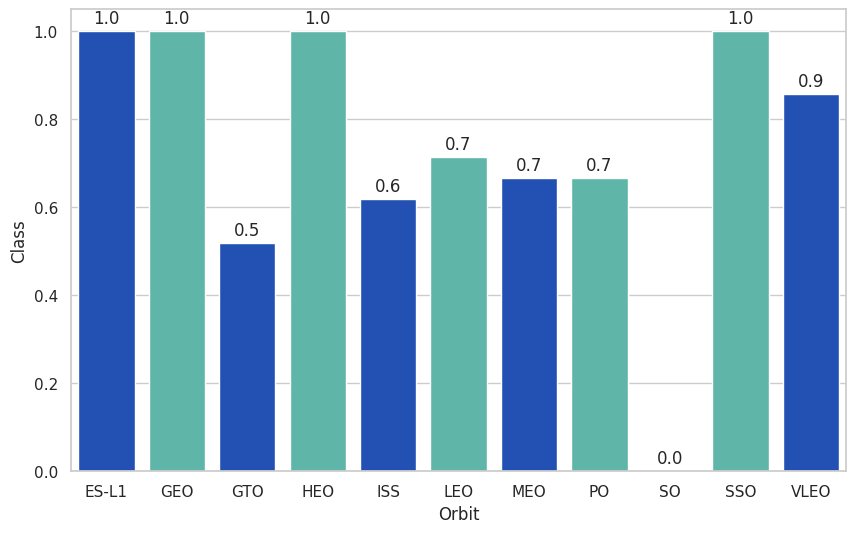

In [88]:
# HINT use groupby method on Orbit column and get the mean of Class column
grouped_data = df.groupby('Orbit')['Class'].mean().reset_index()

plt.figure(figsize=(10, 6))
bar =  sns.barplot(x='Orbit', y='Class', hue='Orbit', data=grouped_data, palette=custom_palette)

for p in bar.patches:
    bar.annotate(format(p.get_height(), '.1f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

### Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


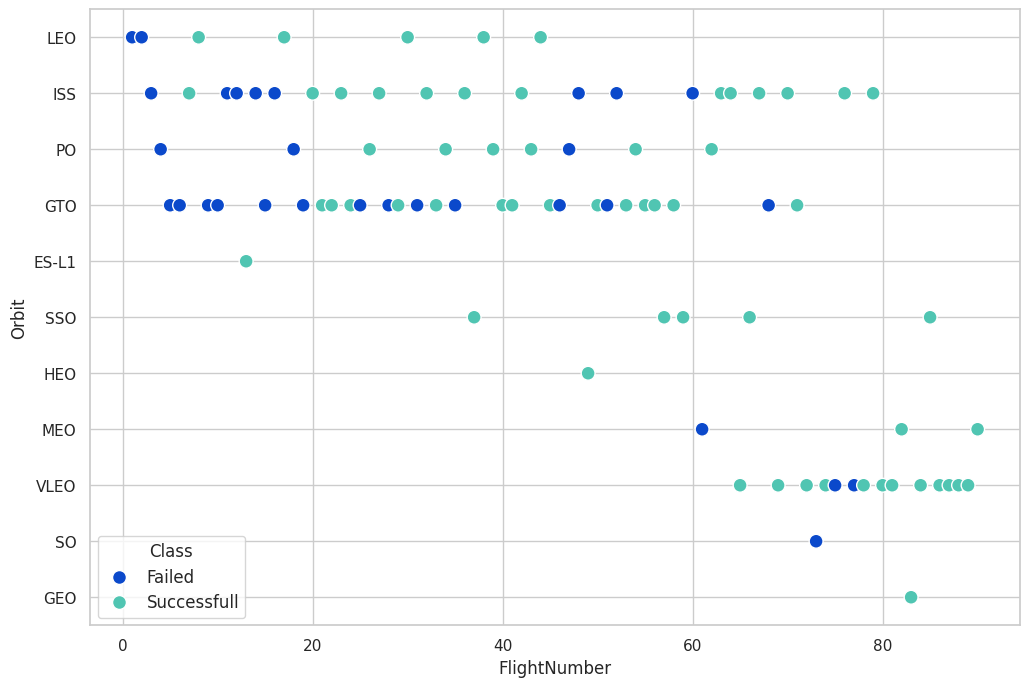

In [123]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df,
                          palette=custom_palette, s=100, edgecolor='w', linewidth=1)

#Rename Labels in legend
new_labels = ['Failed', 'Successfull']  # Specify the new legend labels
legend = scatter.get_legend()

for t, l in zip(legend.texts, new_labels):
    t.set_text(l)
    t.set_fontsize(12)

plt.show()

In the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


### Visualize the relationship between Payload Mass and Orbit type


Plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


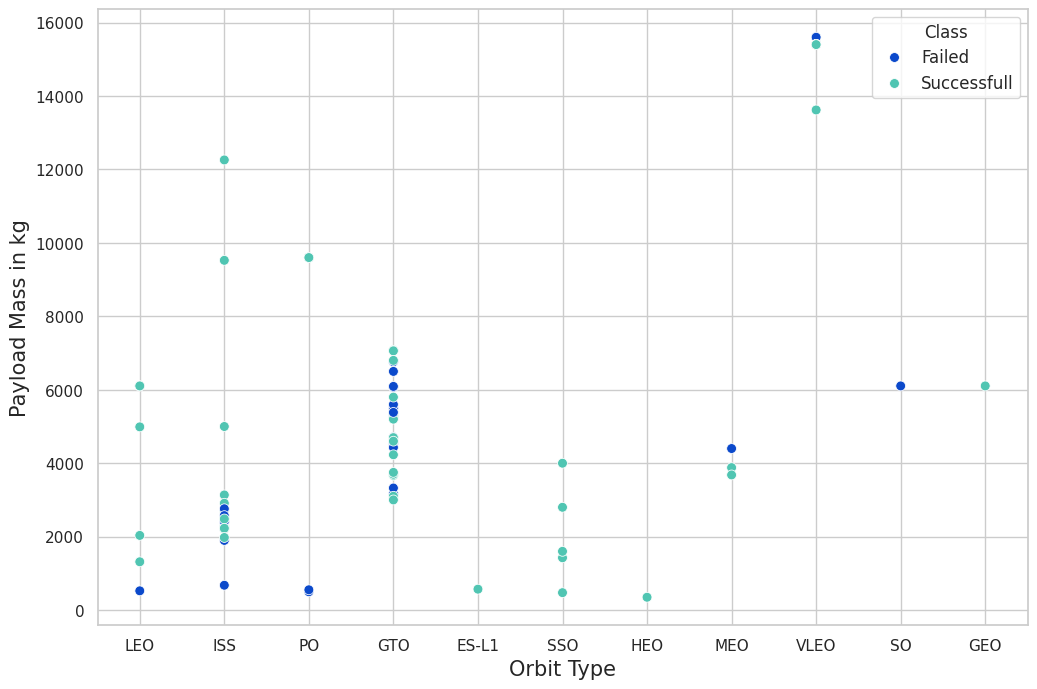

In [130]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8))

graph = sns.scatterplot(y="PayloadMass", x="Orbit", hue="Class", data=df, palette=custom_palette, s=50)

#Rename Labels in legend
new_labels = ['Failed', 'Successfull']  # Specify the new legend labels
legend = graph.get_legend()

for t, l in zip(legend.texts, new_labels):
    t.set_text(l)
    t.set_fontsize(12)

plt.ylabel("Payload Mass in kg",fontsize=15)

plt.xlabel("Orbit Type",fontsize=15)

plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


### Visualize the launch success yearly trend


In [104]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


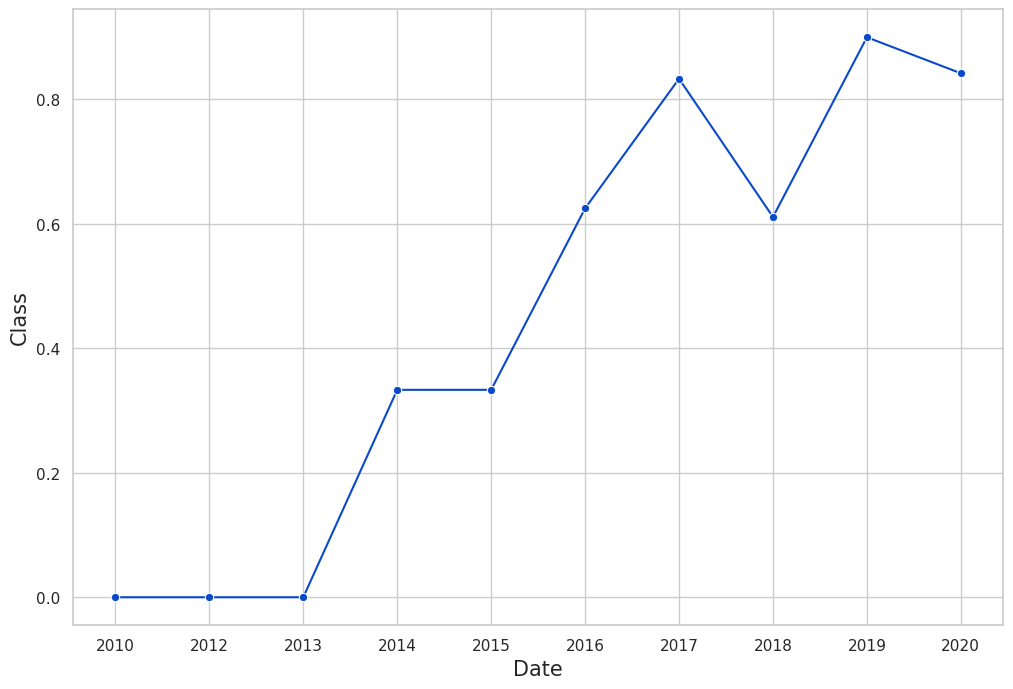

In [112]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

plt.figure(figsize=(12, 8))

line = sns.lineplot(x='Date', y='Class', data=df, errorbar=None, marker='o', linestyle='-', color='#0B49CB')

line.set_xlabel("Date", fontsize=15)
line.set_ylabel("Class", fontsize=15)

plt.show()

The sucess rate since 2013 kept increasing till 2020


## Features Engineering


Obtain some preliminary insights about how each important variable would affect the success rate -> features that will be used in success prediction in the future module.


In [105]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### Create dummy variables to categorical columns


In [113]:
# get_dummies() function for the categorical columns
feature = features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']]
feature1 = features[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features_one_hot = pd.get_dummies(feature1)

features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,2,True,True,True,5.0,2,False,False,...,False,False,False,False,False,False,False,False,True,False
86,87,15400.000000,3,True,True,True,5.0,2,False,False,...,False,False,False,False,False,False,True,False,False,False
87,88,15400.000000,6,True,True,True,5.0,5,False,False,...,False,False,False,True,False,False,False,False,False,False
88,89,15400.000000,3,True,True,True,5.0,2,False,False,...,False,False,False,False,False,False,False,False,True,False


### Cast all numeric columns to `float64`


In [114]:
features_one_hot.astype('float64')

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [115]:
features_one_hot.to_csv('dataset_part\_3.csv', index=False)

<unknown>:1: SyntaxWarning: invalid escape sequence '\_'
<>:1: SyntaxWarning: invalid escape sequence '\_'
<>:1: SyntaxWarning: invalid escape sequence '\_'
<ipython-input-115-2218dfcbde81>:1: SyntaxWarning: invalid escape sequence '\_'
  features_one_hot.to_csv('dataset_part\_3.csv', index=False)


Exercies provided by: [Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
